# Start data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Load files, use lines=true, because of JSONL format (one JSON object per line)

In [2]:
try:
     merchants_df = pd.read_csv('data/merchants.csv')
     print("\nMerchants data loaded.")
except FileNotFoundError:
     print("Couldn't find merchants.csv file.")

try:
     transactions_df = pd.read_json('data/transactions.json', lines=True)
     print("\nTransactions data loaded.")
except FileNotFoundError:
     print("Couldn't find transactions.json file.")

try:
     users_df = pd.read_csv('data/users.csv')
     print("\nUsers data loaded.")
except FileNotFoundError:
     print("Couldn't find users.csv file.")


Merchants data loaded.

Transactions data loaded.

Users data loaded.


In [ ]:
# Basic information about the dataframes
print("\n--- Basic Information ---")

for df_name, df in [('merchants_df', merchants_df if 'merchants_df' in locals() else None),
                    ('transactions_df', transactions_df if 'transactions_df' in locals() else None),
                    ('users_df', users_df if 'users_df' in locals() else None)]:
    if df is not None:
        print(f"\n{df_name.upper()} Shape: {df.shape}")
        print(f"\nFirst 5 rows of {df_name}:")
        display(df.head())
        
        print(f"\nData types in {df_name}:")
        display(df.dtypes)
        
        print(f"\nSummary statistics for {df_name}:")
        display(df.describe(include='all').T)
        
        # Check for missing values
        missing = df.isnull().sum()
        if missing.sum() > 0:
            print(f"\nMissing values in {df_name}:")
            display(missing[missing > 0])
        else:
            print(f"\nNo missing values in {df_name}")


--- Basic Information ---

MERCHANTS_DF Shape: (1000, 8)

First 5 rows of merchants_df:


,merchant_id,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0001,travel,Austria,1.000000,3,97.23,84,0
1,M0002,clothing,Poland,0.689695,2,142.71,93,1
2,M0003,electronics,Czech Republic,0.834610,5,67.83,65,0
3,M0004,electronics,Belgium,0.607229,1,16.77,9,1
4,M0005,grocery,Ireland,0.641901,2,38.56,100,0



Data types in merchants_df:


merchant_id                        object
category                           object
country                            object
trust_score                       float64
number_of_alerts_last_6_months      int64
avg_transaction_amount            float64
account_age_months                  int64
has_fraud_history                   int64
dtype: object


Summary statistics for merchants_df:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
merchant_id,1000,1000,M0001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,1000,7,grocery,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,1000,14,Portugal,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trust_score,1000.0,NaN,NaN,NaN,0.682568,0.194092,0.0,0.545615,0.697414,0.825599,1.0
number_of_alerts_last_6_months,1000.0,NaN,NaN,NaN,3.061,1.72286,0.0,2.0,3.0,4.0,9.0
avg_transaction_amount,1000.0,NaN,NaN,NaN,81.88309,79.187529,0.12,24.7725,58.205,117.1925,709.04
account_age_months,1000.0,NaN,NaN,NaN,61.526,33.453617,6.0,32.0,61.0,92.0,119.0
has_fraud_history,1000.0,NaN,NaN,NaN,0.52,0.49985,0.0,0.0,1.0,1.0,1.0



No missing values in merchants_df

TRANSACTIONS_DF Shape: (500000, 14)

First 5 rows of transactions_df:


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0



Data types in transactions_df:


transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object


Summary statistics for transactions_df:


Created a sample of 100000 transactions from the full 500000 rows

Sample shape: (100000, 14)

Sample head:


,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
104241,TX104241,2023-12-17 23:20:00,U15259,M0085,39.16,in-store,EUR,Web,"{'lat': 54.285634, 'long': -7.415363}",debit_card,1,259,1,1
199676,TX199676,2022-01-30 02:02:00,U07072,M0837,45.89,in-store,EUR,Android,"{'lat': 38.168357, 'long': 9.237343}",credit_card,1,1043,1,0
140199,TX140199,2022-09-04 05:51:00,U10468,M0586,52.16,in-store,EUR,Android,"{'lat': 36.159256, 'long': 3.943777}",debit_card,1,1013,0,0
132814,TX132814,2023-04-25 03:11:00,U03117,M0153,74.25,in-store,EUR,Web,"{'lat': 39.785727, 'long': 16.187356}",credit_card,1,200,1,0
408697,TX408697,2022-01-22 22:02:00,U12784,M0280,12.59,mobile,EUR,iOS,"{'lat': 54.45691, 'long': 39.169997}",credit_card,1,596,1,0



Sample data types:


transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object


Sample summary statistics:


,count,mean,min,25%,50%,75%,max,std
timestamp,100000,2023-01-01 01:44:39.558600192,2022-01-01 00:13:00,2022-07-02 15:06:30,2023-01-01 04:39:30,2023-07-02 16:10:00,2023-12-31 23:57:00,NaN
amount,100000.0,49.695099,0.0,14.3,34.5,69.16,580.32,49.584669
is_international,100000.0,0.92761,0.0,1.0,1.0,1.0,1.0,0.259134
session_length_seconds,100000.0,614.90254,30.0,323.0,613.0,906.0,1200.0,337.490888
is_first_time_merchant,100000.0,0.49927,0.0,0.0,0.0,1.0,1.0,0.500002
is_fraud,100000.0,0.08619,0.0,0.0,0.0,0.0,1.0,0.280646



Numeric columns in the sample: ['amount', 'is_international', 'session_length_seconds', 'is_first_time_merchant', 'is_fraud']

Correlation matrix:


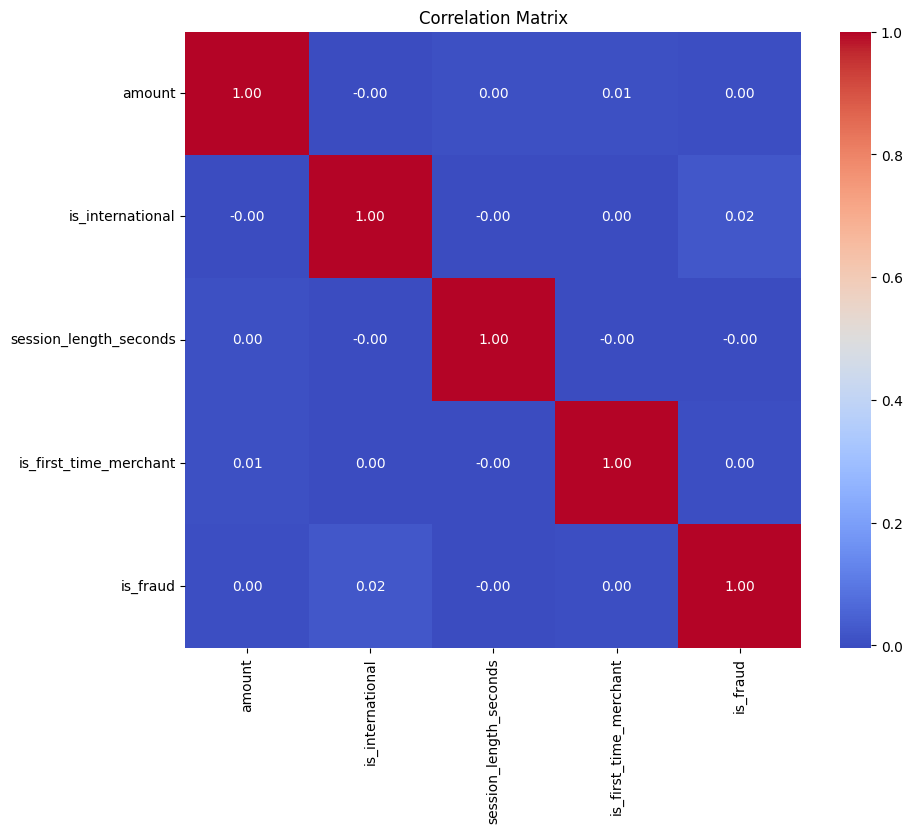

In [9]:
sample_size = 100000  # 100k rows for faster processing
transactions_sample = transactions_df.sample(n=sample_size, random_state=42)
print(f"Created a sample of {sample_size} transactions from the full {transactions_df.shape[0]} rows")

# Basic info on the sample
print(f"\nSample shape: {transactions_sample.shape}")
print("\nSample head:")
display(transactions_sample.head())
print("\nSample data types:")
display(transactions_sample.dtypes)
print("\nSample summary statistics:")
display(transactions_sample.describe().T)

numeric_columns = transactions_sample.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns in the sample: {numeric_columns}")
print("\nCorrelation matrix:")
correlation_matrix = transactions_sample[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [17]:
fraud_df = transactions_df[transactions_df['is_fraud'] == 1]
print(f"\nFraudulent transactions shape: {fraud_df.shape}")
print(f"\nFraudulent transactions percentage: {len(fraud_df) / len(transactions_df) * 100:.2f}%")

fraud_by_merchant = transactions_df['merchant_id'].value_counts().reset_index()
fraud_by_merchant.columns = ['merchant_id', 'fraud_count']
merchant_stats = fraud_by_merchant.merge(merchants_df, on='merchant_id', how='left')
display(merchant_stats.describe().T)



Fraudulent transactions shape: (42411, 14)

Fraudulent transactions percentage: 8.48%


,count,mean,std,min,25%,50%,75%,max
fraud_count,1000.0,500.000000,22.280000,429.00,485.000000,500.000000,514.000000,571.00
trust_score,1000.0,0.682568,0.194092,0.00,0.545615,0.697414,0.825599,1.00
number_of_alerts_last_6_months,1000.0,3.061000,1.722860,0.00,2.000000,3.000000,4.000000,9.00
avg_transaction_amount,1000.0,81.883090,79.187529,0.12,24.772500,58.205000,117.192500,709.04
account_age_months,1000.0,61.526000,33.453617,6.00,32.000000,61.000000,92.000000,119.00
has_fraud_history,1000.0,0.520000,0.499850,0.00,0.000000,1.000000,1.000000,1.00



Numeric columns in the sample: ['fraud_count', 'trust_score', 'number_of_alerts_last_6_months', 'avg_transaction_amount', 'account_age_months', 'has_fraud_history']

Correlation matrix:


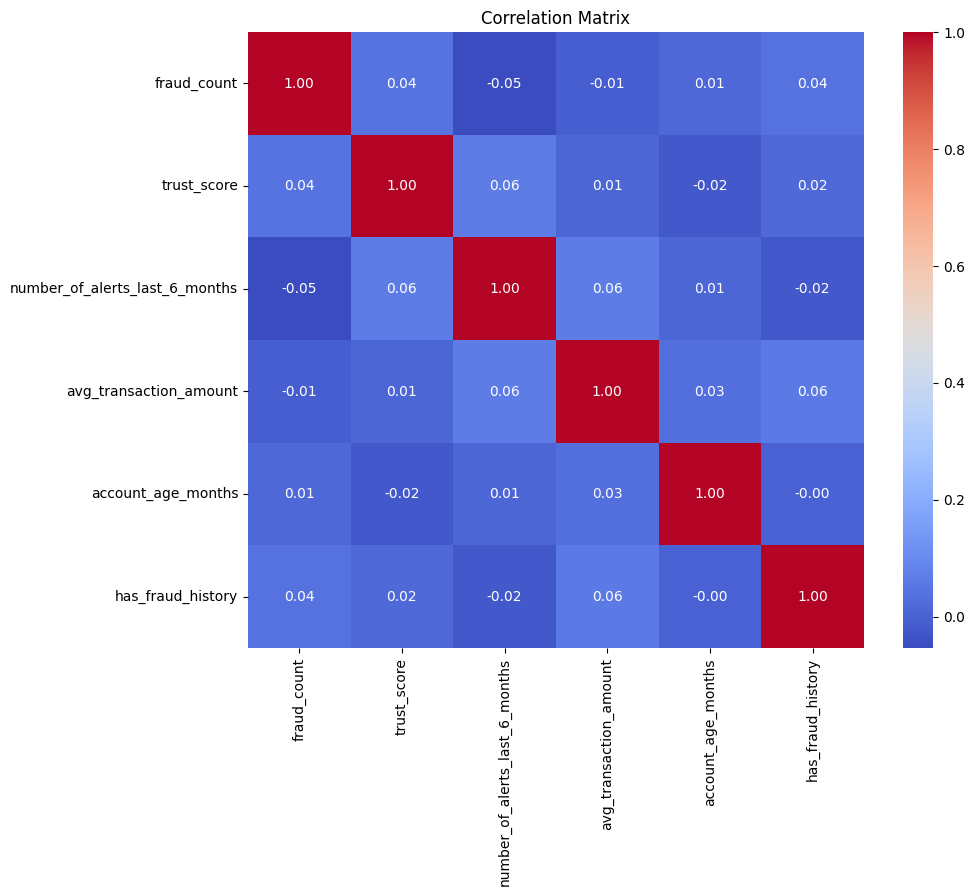

In [16]:
numeric_columns = merchant_stats.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns in the sample: {numeric_columns}")
print("\nCorrelation matrix:")
correlation_matrix = merchant_stats[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()